<a href="https://colab.research.google.com/github/carpalmar/IA-FUNDAMENTALS/blob/main/Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#Código para Experimentos del Problema de la Mochila

import time
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Tuple, Dict

In [7]:
# 1. Primero definimos la estructura básica de nuestro problema
class Item:
    """Clase para representar un item que puede ir en la mochila"""
    def __init__(self, peso: float, valor: float, nombre: str = None):
        self.peso = peso
        self.valor = valor
        self.nombre = nombre or f"Item({peso},{valor})"

    def __repr__(self):
        return self.nombre

In [8]:
# 2. Funciones auxiliares para evaluar soluciones
def calcular_peso_total(items, solucion):
    """Calcula el peso total de los items seleccionados"""
    return sum(item.peso for item, incluido in zip(items, solucion) if incluido)

def calcular_valor_total(items, solucion):
    """Calcula el valor total de los items seleccionados"""
    return sum(item.valor for item, incluido in zip(items, solucion) if incluido)

def evaluar_solucion(items, solucion, capacidad):
    """
    Evalúa una solución del problema de la mochila.
    Retorna 0 si la solución excede la capacidad.
    """
    peso_total = calcular_peso_total(items, solucion)
    if peso_total > capacidad:
        return 0
    return calcular_valor_total(items, solucion)

In [23]:
# 3. Funciones para generar soluciones
def generar_solucion_aleatoria(n_items):
    """Genera una solución aleatoria para n items"""
    return [random.random() < 0.5 for _ in range(n_items)]

def generar_vecino(solucion):
    """Genera un vecino cambiando un elemento aleatorio"""
    vecino = solucion.copy()
    idx = random.randrange(len(vecino))
    vecino[idx] = not vecino[idx]
    return vecino

In [10]:
# 4. Implementación de Hill Climbing
def hill_climbing(items, capacidad, max_iteraciones=1000):
    """
    Algoritmo Hill Climbing para el problema de la mochila

    Parámetros:
    - items: lista de Items
    - capacidad: capacidad máxima de la mochila
    - max_iteraciones: número máximo de iteraciones

    Retorna:
    - mejor solución encontrada
    - valor de la mejor solución
    - historia de valores para visualización
    """
    # Generar solución inicial
    actual = generar_solucion_aleatoria(len(items))
    valor_actual = evaluar_solucion(items, actual, capacidad)
    historia = [(0, valor_actual)]

    # Iteración principal
    for i in range(1, max_iteraciones + 1):
        # Generar y evaluar vecino
        vecino = generar_vecino(actual)
        valor_vecino = evaluar_solucion(items, vecino, capacidad)

        # Si el vecino es mejor, movernos a él
        if valor_vecino > valor_actual:
            actual = vecino
            valor_actual = valor_vecino

        historia.append((i, valor_actual))

    return actual, valor_actual, historia

In [11]:
# 5. Implementación de Simulated Annealing
def simulated_annealing(items, capacidad, max_iteraciones=1000, temp_inicial=100.0,
                       tasa_enfriamiento=0.95):
    """
    Algoritmo Simulated Annealing para el problema de la mochila

    Parámetros:
    - items: lista de Items
    - capacidad: capacidad máxima de la mochila
    - max_iteraciones: número máximo de iteraciones
    - temp_inicial: temperatura inicial
    - tasa_enfriamiento: tasa de enfriamiento por iteración

    Retorna:
    - mejor solución encontrada
    - valor de la mejor solución
    - historia de valores para visualización
    """

    # Generar solución inicial
    actual = generar_solucion_aleatoria(len(items))
    valor_actual = evaluar_solucion(items, actual, capacidad)
    mejor = actual.copy()
    mejor_valor = valor_actual
    temp = temp_inicial
    historia = [(0, valor_actual)]

    # Iteración principal
    for i in range(1, max_iteraciones + 1):
        # Generar y evaluar vecino
        vecino = generar_vecino(actual)
        valor_vecino = evaluar_solucion(items, vecino, capacidad)

        # Calcular delta y decidir si aceptar la nueva solución
        delta = valor_vecino - valor_actual
        if delta > 0 or random.random() < np.exp(delta / temp):
            actual = vecino
            valor_actual = valor_vecino

            # Actualizar la mejor solución si corresponde
            if valor_actual > mejor_valor:
                mejor = actual.copy()
                mejor_valor = valor_actual

        # Enfriar temperatura
        temp *= tasa_enfriamiento
        historia.append((i, valor_actual))

    return mejor, mejor_valor, historia

In [12]:
# 6. Funciones de visualización
def visualizar_comparacion(resultados_hc, resultados_sa, titulo="Comparación de Algoritmos"):
    """
    Crea una gráfica comparativa de Hill Climbing y Simulated Annealing
    """

    # Crear figura
    plt.figure(figsize=(12, 6))

    # Extraer datos para la gráfica
    iteraciones_hc, valores_hc = zip(*resultados_hc[2])  # La historia está en el tercer elemento
    iteraciones_sa, valores_sa = zip(*resultados_sa[2])

    # Graficar las líneas
    plt.plot(iteraciones_hc, valores_hc, label='Hill Climbing', color='blue')
    plt.plot(iteraciones_sa, valores_sa, label='Simulated Annealing', color='green')

    # Configurar la gráfica
    plt.title(titulo)
    plt.xlabel('Iteraciones')
    plt.ylabel('Valor')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()

    # Mostrar los mejores valores encontrados
    plt.axhline(y=resultados_hc[1], color='blue', linestyle='--', alpha=0.3)
    plt.axhline(y=resultados_sa[1], color='green', linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()

In [13]:
# 7. Función para mostrar resultados
def mostrar_resultados(items, solucion, valor, algoritmo=""):
    """Muestra los resultados de manera formateada"""
    print(f"\nResultados {algoritmo}:")
    print(f"Valor total: {valor}")
    print("Items seleccionados:")
    for item, incluido in zip(items, solucion):
        if incluido:
            print(f"- {item.nombre}: peso={item.peso}, valor={item.valor}")

In [14]:
# 8. Ejemplo de uso
def ejecutar_ejemplo():
    # Crear items de ejemplo
    items_ejemplo = [
        Item(2, 3, "Libro"),
        Item(3, 4, "Laptop"),
        Item(4, 5, "Cámara"),
        Item(5, 6, "Teléfono"),
        Item(6, 7, "Tablet"),
        Item(7, 8, "Consola"),
        Item(8, 9, "Proyector"),
        Item(9, 10, "Impresora")
    ]
    capacidad_mochila = 20

    # Ejecutar Hill Climbing
    print("\nEjecutando Hill Climbing...")
    resultados_hc = hill_climbing(items_ejemplo, capacidad_mochila, max_iteraciones=100)

    # Ejecutar Simulated Annealing
    print("Ejecutando Simulated Annealing...")
    resultados_sa = simulated_annealing(
        items_ejemplo,
        capacidad_mochila,
        max_iteraciones=100,
        temp_inicial=100.0,
        tasa_enfriamiento=0.95
    )

    # Mostrar resultados
    mostrar_resultados(items_ejemplo, resultados_hc[0], resultados_hc[1], "Hill Climbing")
    mostrar_resultados(items_ejemplo, resultados_sa[0], resultados_sa[1], "Simulated Annealing")

    # Crear visualización
    visualizar_comparacion(resultados_hc, resultados_sa)


Ejecutando Hill Climbing...
Ejecutando Simulated Annealing...

Resultados Hill Climbing:
Valor total: 23
Items seleccionados:
- Libro: peso=2, valor=3
- Cámara: peso=4, valor=5
- Tablet: peso=6, valor=7
- Consola: peso=7, valor=8

Resultados Simulated Annealing:
Valor total: 24
Items seleccionados:
- Libro: peso=2, valor=3
- Laptop: peso=3, valor=4
- Consola: peso=7, valor=8
- Proyector: peso=8, valor=9


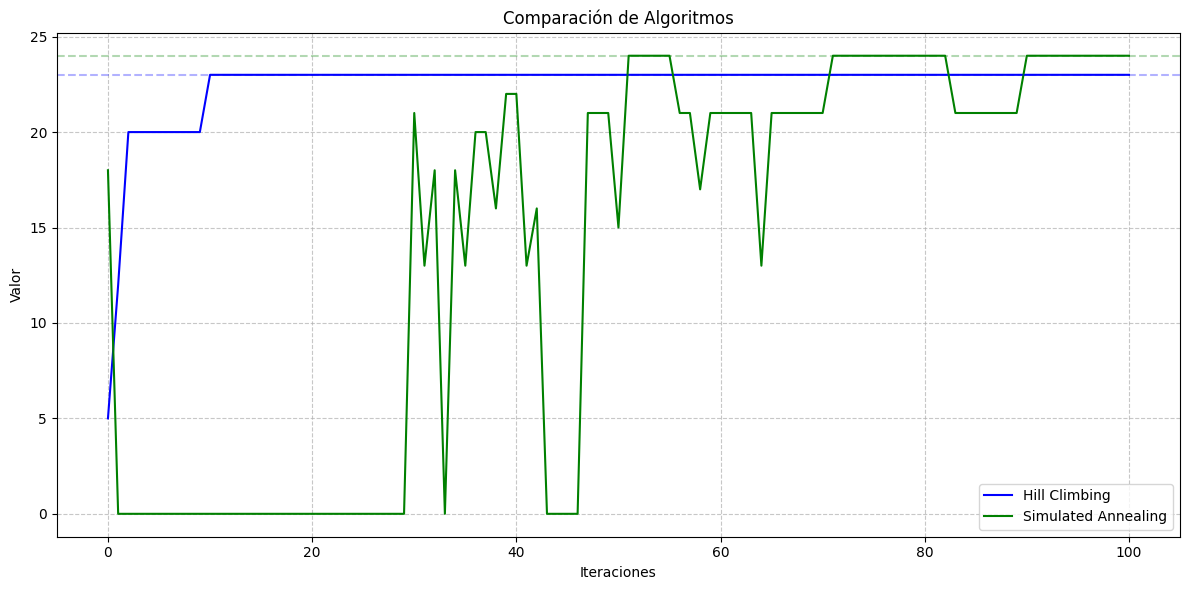

In [15]:
if __name__ == "__main__":
    ejecutar_ejemplo()

In [3]:
def ejecutar_experimentos(items, capacidad, n_ejecuciones=10):
    """
    Ejecuta múltiples experimentos y recopila estadísticas
    """
    resultados = {
        'hill_climbing': {
            'tiempos': [],
            'valores': [],
            'historias': []
        },
        'simulated_annealing': {
            'tiempos': [],
            'valores': [],
            'historias': []
        }
    }

    for _ in range(n_ejecuciones):
        # Hill Climbing
        tiempo_inicio = time.time()
        solucion_hc, valor_hc, historia_hc = hill_climbing(items, capacidad)
        tiempo_hc = time.time() - tiempo_inicio

        resultados['hill_climbing']['tiempos'].append(tiempo_hc)
        resultados['hill_climbing']['valores'].append(valor_hc)
        resultados['hill_climbing']['historias'].append(historia_hc)

        # Simulated Annealing
        tiempo_inicio = time.time()
        solucion_sa, valor_sa, historia_sa = simulated_annealing(items, capacidad)
        tiempo_sa = time.time() - tiempo_inicio

        resultados['simulated_annealing']['tiempos'].append(tiempo_sa)
        resultados['simulated_annealing']['valores'].append(valor_sa)
        resultados['simulated_annealing']['historias'].append(historia_sa)

    return resultados

In [19]:
def visualizar_resultados_experimentales(resultados):
    """
    Crea visualizaciones detalladas de los resultados experimentales
    """
    # Configurar el estilo de las gráficas
    #plt.style.use('seaborn')

    # 1. Gráfico de cajas para valores obtenidos
    plt.figure(figsize=(10, 6))
    plt.boxplot([
        resultados['hill_climbing']['valores'],
        resultados['simulated_annealing']['valores']
    ], labels=['Hill Climbing', 'Simulated Annealing'])
    plt.title('Distribución de Valores Obtenidos')
    plt.ylabel('Valor')
    plt.show()

    # 2. Gráfico de cajas para tiempos de ejecución
    plt.figure(figsize=(10, 6))
    plt.boxplot([
        resultados['hill_climbing']['tiempos'],
        resultados['simulated_annealing']['tiempos']
    ], labels=['Hill Climbing', 'Simulated Annealing'])
    plt.title('Distribución de Tiempos de Ejecución')
    plt.ylabel('Tiempo (segundos)')
    plt.show()

    # 3. Gráfico de convergencia promedio
    plt.figure(figsize=(12, 6))

    # Calcular promedio de historias para HC
    historias_hc = np.array([[v for _, v in h] for h in resultados['hill_climbing']['historias']])
    media_hc = np.mean(historias_hc, axis=0)
    std_hc = np.std(historias_hc, axis=0)

    # Calcular promedio de historias para SA
    historias_sa = np.array([[v for _, v in h] for h in resultados['simulated_annealing']['historias']])
    media_sa = np.mean(historias_sa, axis=0)
    std_sa = np.std(historias_sa, axis=0)

    # Graficar
    x = range(len(media_hc))
    plt.plot(x, media_hc, label='Hill Climbing', color='blue')
    plt.fill_between(x, media_hc - std_hc, media_hc + std_hc, color='blue', alpha=0.2)

    plt.plot(x, media_sa, label='Simulated Annealing', color='green')
    plt.fill_between(x, media_sa - std_sa, media_sa + std_sa, color='green', alpha=0.2)

    plt.title('Convergencia Promedio')
    plt.xlabel('Iteraciones')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.show()

In [5]:
# Función principal para ejecutar experimentos
def ejecutar_analisis_experimental():
    # Crear items de ejemplo
    items_ejemplo = [
        Item(2, 3, "Libro"),
        Item(3, 4, "Laptop"),
        Item(4, 5, "Cámara"),
        Item(5, 6, "Teléfono"),
        Item(6, 7, "Tablet"),
        Item(7, 8, "Consola"),
        Item(8, 9, "Proyector"),
        Item(9, 10, "Impresora")
    ]
    capacidad_mochila = 20

    # Ejecutar experimentos
    print("Ejecutando experimentos...")
    resultados = ejecutar_experimentos(items_ejemplo, capacidad_mochila, n_ejecuciones=10)

    # Mostrar estadísticas
    print("\nEstadísticas:")
    for algoritmo in ['hill_climbing', 'simulated_annealing']:
        valores = resultados[algoritmo]['valores']
        tiempos = resultados[algoritmo]['tiempos']

        print(f"\n{algoritmo.replace('_', ' ').title()}:")
        print(f"Valor promedio: {np.mean(valores):.2f} ± {np.std(valores):.2f}")
        print(f"Mejor valor: {max(valores):.2f}")
        print(f"Tiempo promedio: {np.mean(tiempos)*1000:.2f} ± {np.std(tiempos)*1000:.2f} ms")

    # Visualizar resultados
    visualizar_resultados_experimentales(resultados)

Ejecutando experimentos...

Estadísticas:

Hill Climbing:
Valor promedio: 16.10 ± 10.57
Mejor valor: 24.00
Tiempo promedio: 3.57 ± 1.30 ms

Simulated Annealing:
Valor promedio: 23.90 ± 0.30
Mejor valor: 24.00
Tiempo promedio: 5.47 ± 0.77 ms


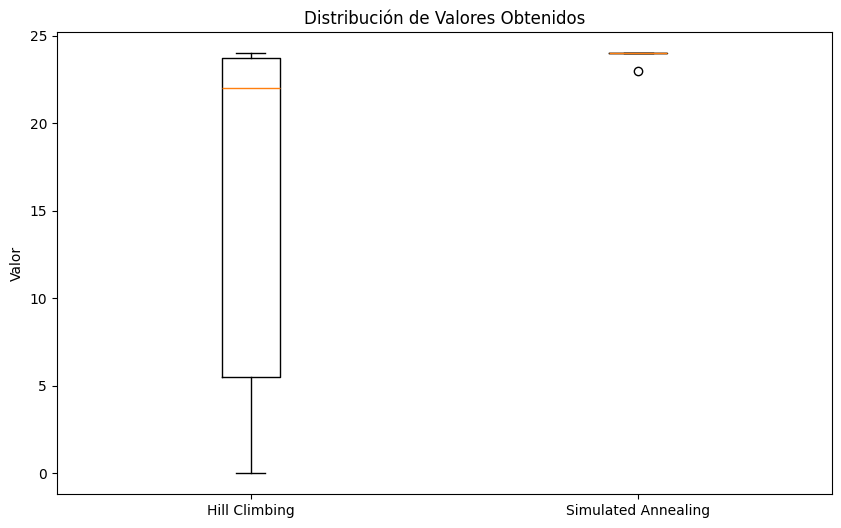

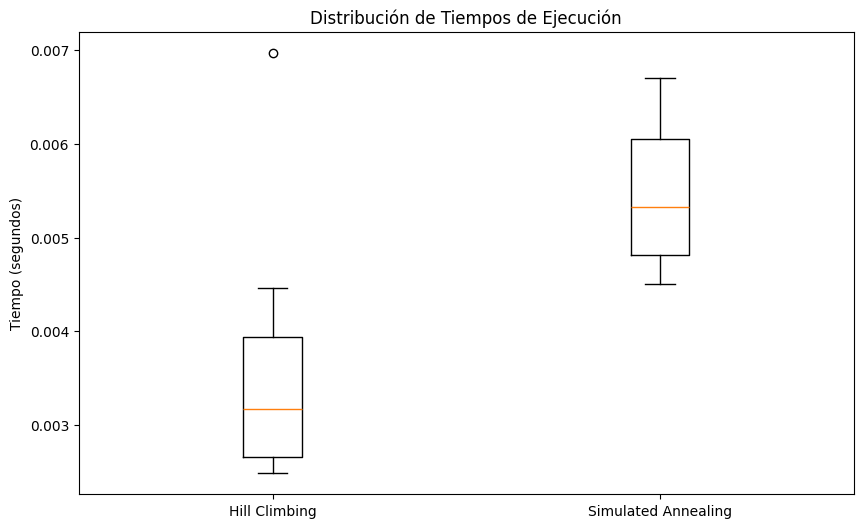

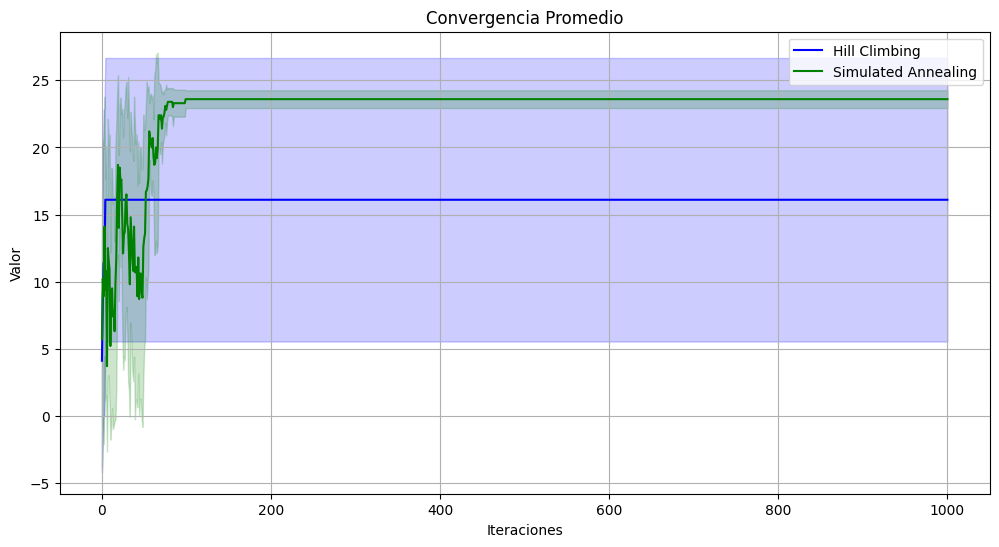

In [20]:
if __name__ == "__main__":
    ejecutar_analisis_experimental()